## This is an analysis of the Medical Cost dataset, by Prabhmeet Singh Deol.

### First we will import pandas, and use it to read the dataset. As well as do some method cleaning, and some data Wrangling. All of that has been Chained together, in the chunk , below for the purpose of ease to read , and debug.

In [33]:
import pandas as pd
from pandas_profiling import ProfileReport as pf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# This part processes the data without any method chaining.

dataSet = (
		pd.read_csv('./../../data/processed/Processed_Medical_Data.csv')
	 	.loc[:,['bmi','charges']]
	 	.rename(columns={'charges':"Charges_USD"})
	 	.round({'bmi': 2, 'Charges_USD': 1})
		.astype({'bmi':float})

		)
#dataSet = dataSet[dataSet['bmi']<40]
## Adding more informative columns to our data Set.
def categorizeBmi(row):
	bmi = float(row['bmi'])
	if bmi < 18.59:
		return "Underweight"
	elif bmi < 24.99:
		return "Normal"
	elif bmi <29.99:
		return "Overweight"
	elif bmi >= 30.0:
		return "Obese"

dataSet['BMI_Category'] = dataSet.apply(categorizeBmi,axis='columns')



## This pandas Filter information, allows us to perform , and review several analytical tests , that might show some correlation.

In [34]:
#dataSet = pd.DataFrame(dataSet)
#pf(dataSet).to_notebook_iframe()

## Pair plots, gives us several plots for all the different variables in out data Set.

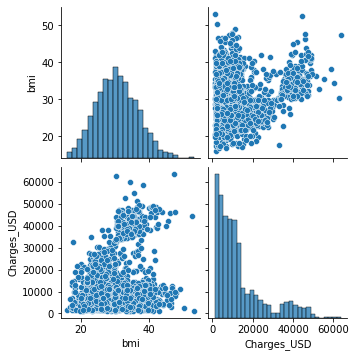

In [35]:
## Exploratory Research
plot1 = sns.pairplot(dataSet,palette="virdis")

## Now we will present some statitistical data about our data Set.

## We will Demonstrate the total number of 

/Users/deol/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'BMI Category'),
 Text(0.5, 1.0, 'Count of Different BMI Categories in the data Set.')]

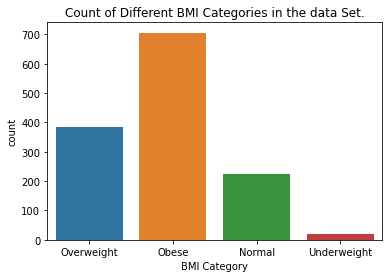

In [36]:
countplot = sns.countplot(dataSet['BMI_Category'])
countplot.set(
	xlabel = "BMI Category",title="Count of Different BMI Categories in the data Set."
)

The following code Displays a short summary statistics of Medical Charges of different BMI categories of American Citizens.

In [62]:
moneyStats=dataSet.groupby('BMI_Category')['Charges_USD'].agg(['mean','std','min', 'median','max']).round(1).T
moneyStats

BMI_Category,Normal,Obese,Overweight,Underweight
mean,10434.5,15572.0,10987.5,8657.6
std,7512.8,14553.2,8039.5,7591.7
min,1121.9,1131.5,1252.4,1621.3
median,8604.2,10003.7,8659.4,6640.5
max,35069.4,63770.4,38245.6,32734.2


<ipython-input-38-5859deac4768>:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


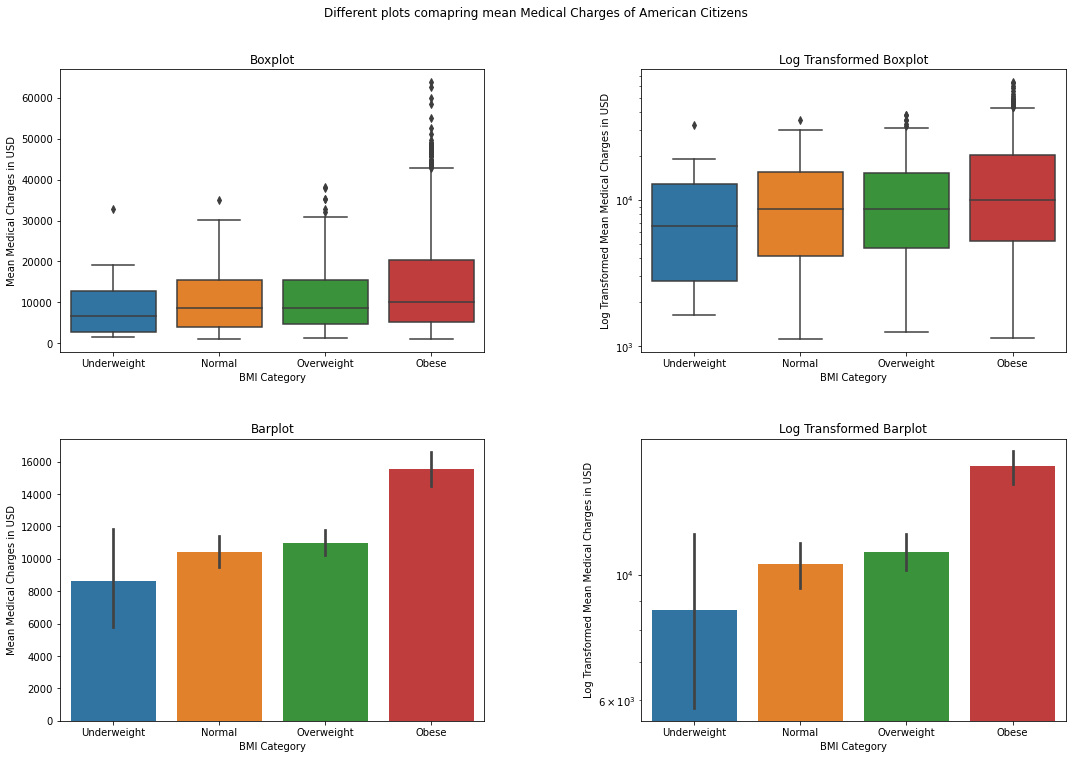

In [38]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
logbarplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
logbarplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Barplot",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()


<ipython-input-82-388f91a45ecb>:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


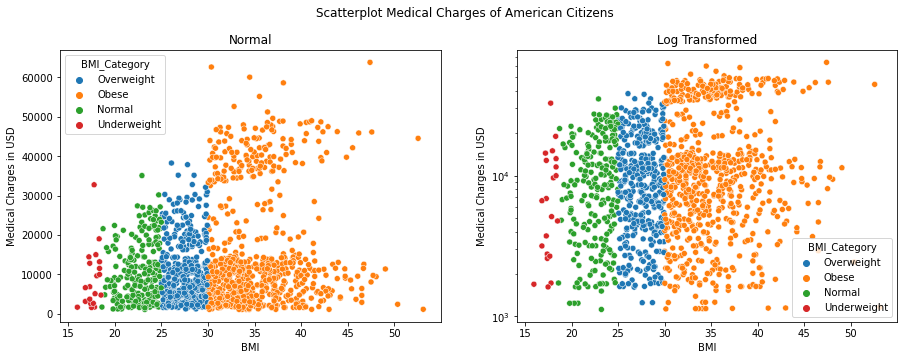

In [82]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[0],
	)
scatter1.set(
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Normal",
)
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
plt.suptitle("Scatterplot Medical Charges of American Citizens",y=1)
fig.show()

[None,
 Text(0.5, 0, 'BMI '),
 Text(0, 0.5, 'Medical Charges in USD'),
 Text(0.5, 1.0, 'BMI vs Medical Charges of U.S. Citizens')]

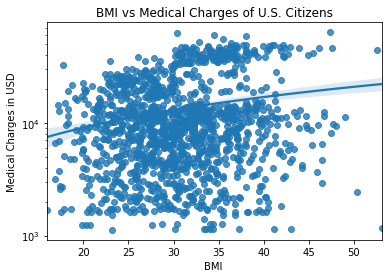

In [40]:
regplot = sns.regplot(
	data = dataSet,
	x="bmi",
	y="Charges_USD",
)
regplot.set(
	yscale="log",
	xlabel="BMI ",
	ylabel="Medical Charges in USD",
	title="BMI vs Medical Charges of U.S. Citizens",
)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

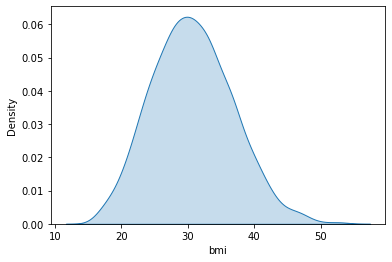

In [86]:
sns.kdeplot(
   data=dataSet, x="bmi",fill=True
)